In [129]:
# import necessary tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA

In [150]:
# load the data
df=pd.read_csv('CC GENERAL.csv')

# data overview
df.sample(8)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3135,C13225,7387.803893,1.000000,208.00,208.00,0.00,6728.679523,0.250000,0.250000,0.000000,0.416667,7,3,14000.0,1613.637071,1686.828820,0.000000,12
4655,C14781,158.878732,1.000000,738.65,0.00,738.65,109.368455,0.833333,0.000000,0.833333,0.083333,1,16,7500.0,899.237200,170.492035,0.166667,12
256,C10266,5.871769,0.818182,29.68,29.68,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,10000.0,76.943584,75.595199,0.000000,12
3708,C13813,3265.116481,0.727273,2147.01,0.00,2147.01,0.000000,1.000000,0.000000,1.000000,0.000000,0,60,8000.0,8481.013758,2978.655593,0.000000,12
2018,C12081,2567.090886,1.000000,1875.54,546.14,1329.40,598.035427,1.000000,0.333333,1.000000,0.333333,5,52,3900.0,772.320791,632.994269,0.000000,12
6035,C16205,214.699856,1.000000,440.44,440.44,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,22,3000.0,541.027445,197.297640,0.000000,12
3670,C13774,49.789963,1.000000,700.00,0.00,700.00,0.000000,1.000000,0.000000,0.900000,0.000000,0,10,1000.0,658.477880,160.909873,1.000000,10
8755,C18994,3.036243,0.090909,0.00,0.00,0.00,81.569379,0.000000,0.000000,0.000000,0.083333,1,0,500.0,0.000000,NaN,0.000000,12


### List of columns from the dataframe:

    # BALANCE : Balance amount left in their account to make purchases
    # BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 
                    # (1 = frequently updated, 0 = not frequently updated)
    # PURCHASES : Amount of purchases made from account
    # ONEOFF_PURCHASES : Maximum purchase amount done in one-go
    # INSTALLMENTS_PURCHASES : Amount of purchase done in installment
    # CASH_ADVANCE : Cash in advance given by the user
    # PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 
                         # (1 = frequently purchased, 0 = not frequently purchased)
    # ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go 
                                # (1 = frequently purchased, 0 = not frequently purchased)
    # PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done 
                                    # (1 = frequently done, 0 = not frequently done)
    # CASH_ADVANCE_FREQUENCY : How frequently the cash in advance being paid
    # CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
    # PURCHASES_TRX : Number of purchase transactions made
    # CREDIT_LIMIT:  Limit of Credit Card for user
    # PAYMENTS : Amount of Payment done by user
    # MINIMUM_PAYMENTS : Minimum amount of payments made by user
    # PRCFULLPAYMENT : Percent of full payment paid by user
    # TENURE : Tenure of credit card service for user

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [152]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


# data cleaning

In [153]:
dtypes = pd.DataFrame(df.dtypes,columns=["Data Type"])

dtypes["Unique Values"]=df.nunique()

dtypes["Null Values"]=df.isnull().sum()

dtypes["% null Values"]=df.isnull().sum()/len(df)

dtypes.sort_values(by="Null Values" , ascending=False)

,Data Type,Unique Values,Null Values,% null Values
MINIMUM_PAYMENTS,float64,8636,313,0.034972
CREDIT_LIMIT,float64,205,1,0.000112
CUST_ID,object,8950,0,0.000000
BALANCE,float64,8871,0,0.000000
PRC_FULL_PAYMENT,float64,47,0,0.000000
PAYMENTS,float64,8711,0,0.000000
PURCHASES_TRX,int64,173,0,0.000000
CASH_ADVANCE_TRX,int64,65,0,0.000000
CASH_ADVANCE_FREQUENCY,float64,54,0,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,float64,47,0,0.000000


In [154]:
# 'CUST_ID' is a feature with unique id for each customer, I'll drop it:
df.drop('CUST_ID', axis=1, inplace=True)

## Data cleaning - dealing with missing values

In [155]:
# impute missing values with KNNImputer
imputer = imputer = KNNImputer()
imputed = imputer.fit_transform(df)
df = pd.DataFrame(imputed, columns=df.columns)

In [156]:
# double check missing values
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Exploratory Data Analysis

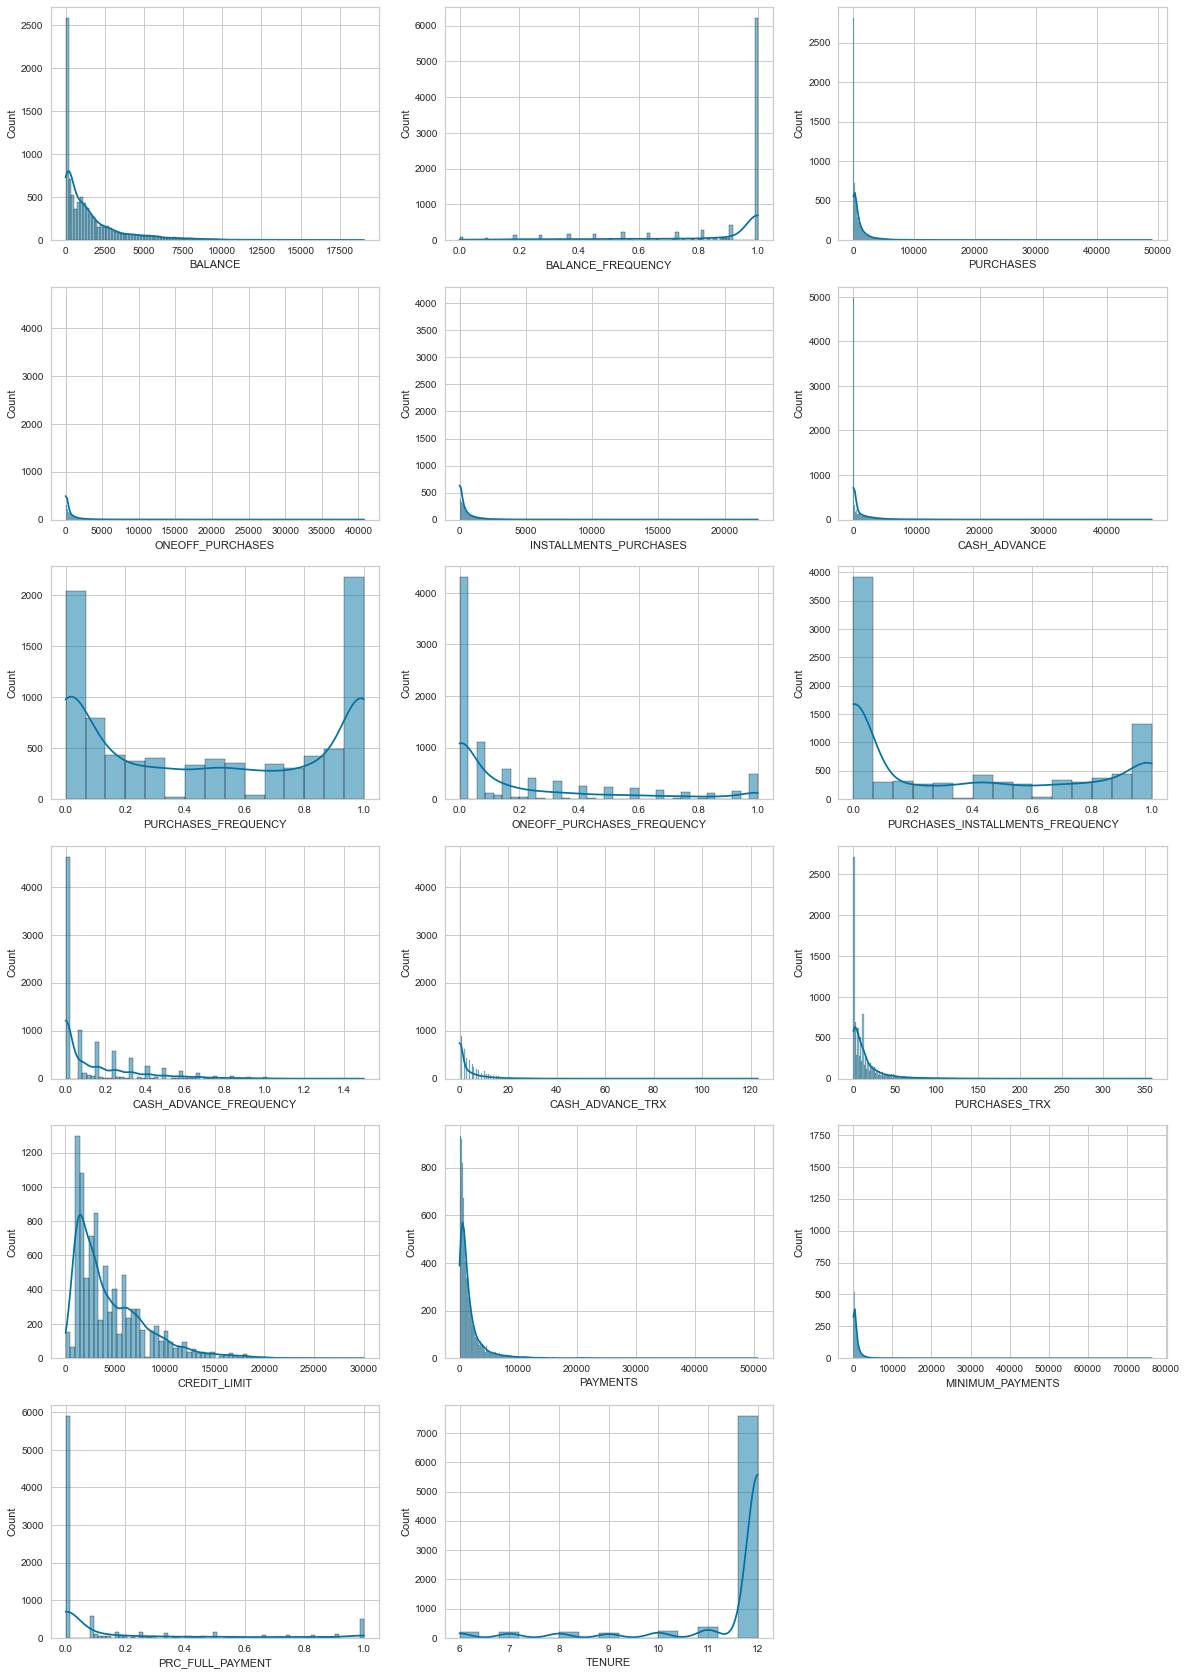

In [157]:
# Let's check the distributions of our features

plt.figure(figsize=(20,30))

for i, col in enumerate(df.columns):
        ax = plt.subplot(6, 3, i+1)
        sns.histplot(df[col] , ax=ax , kde=True)
        plt.xlabel(col)

plt.show()

    # Most of the features are Right Skewed with most of the values being (or close to) zero
    
    # Two features are Left Skewed (BALANCE_FREQUENCY, TENURE)
    
    # Only 'PURCHASES_FREQUENCY' have a similar amount of zeros and ones.

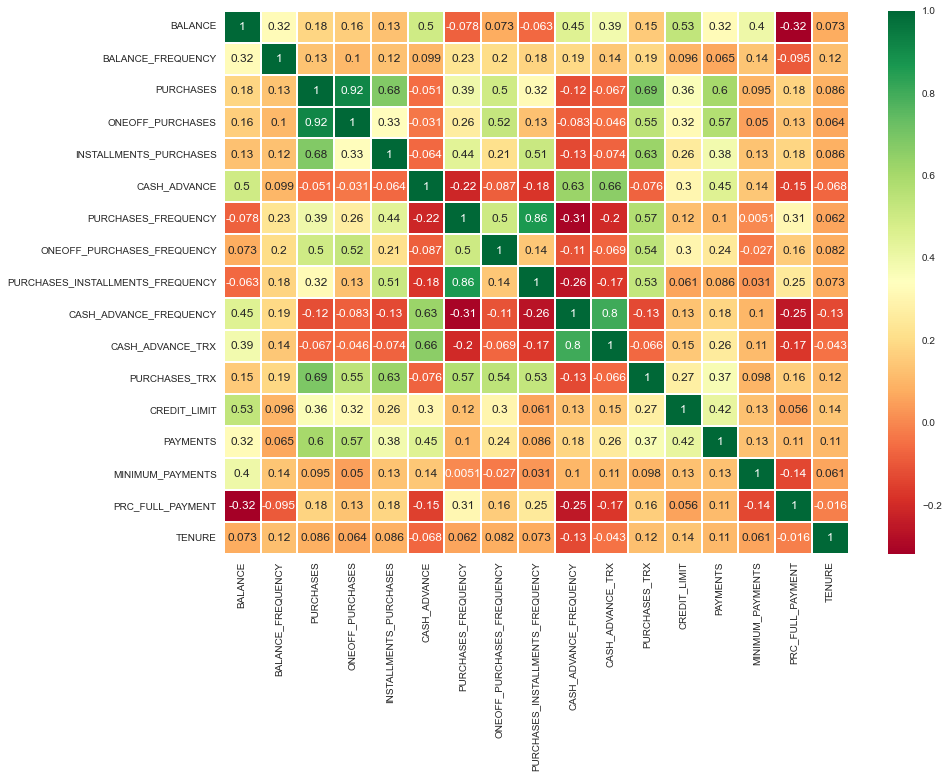

In [158]:
# Let's look at the correlation between our features
corr=df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.05)
plt.show()

# Data preprocessing

## Dealing with outliers

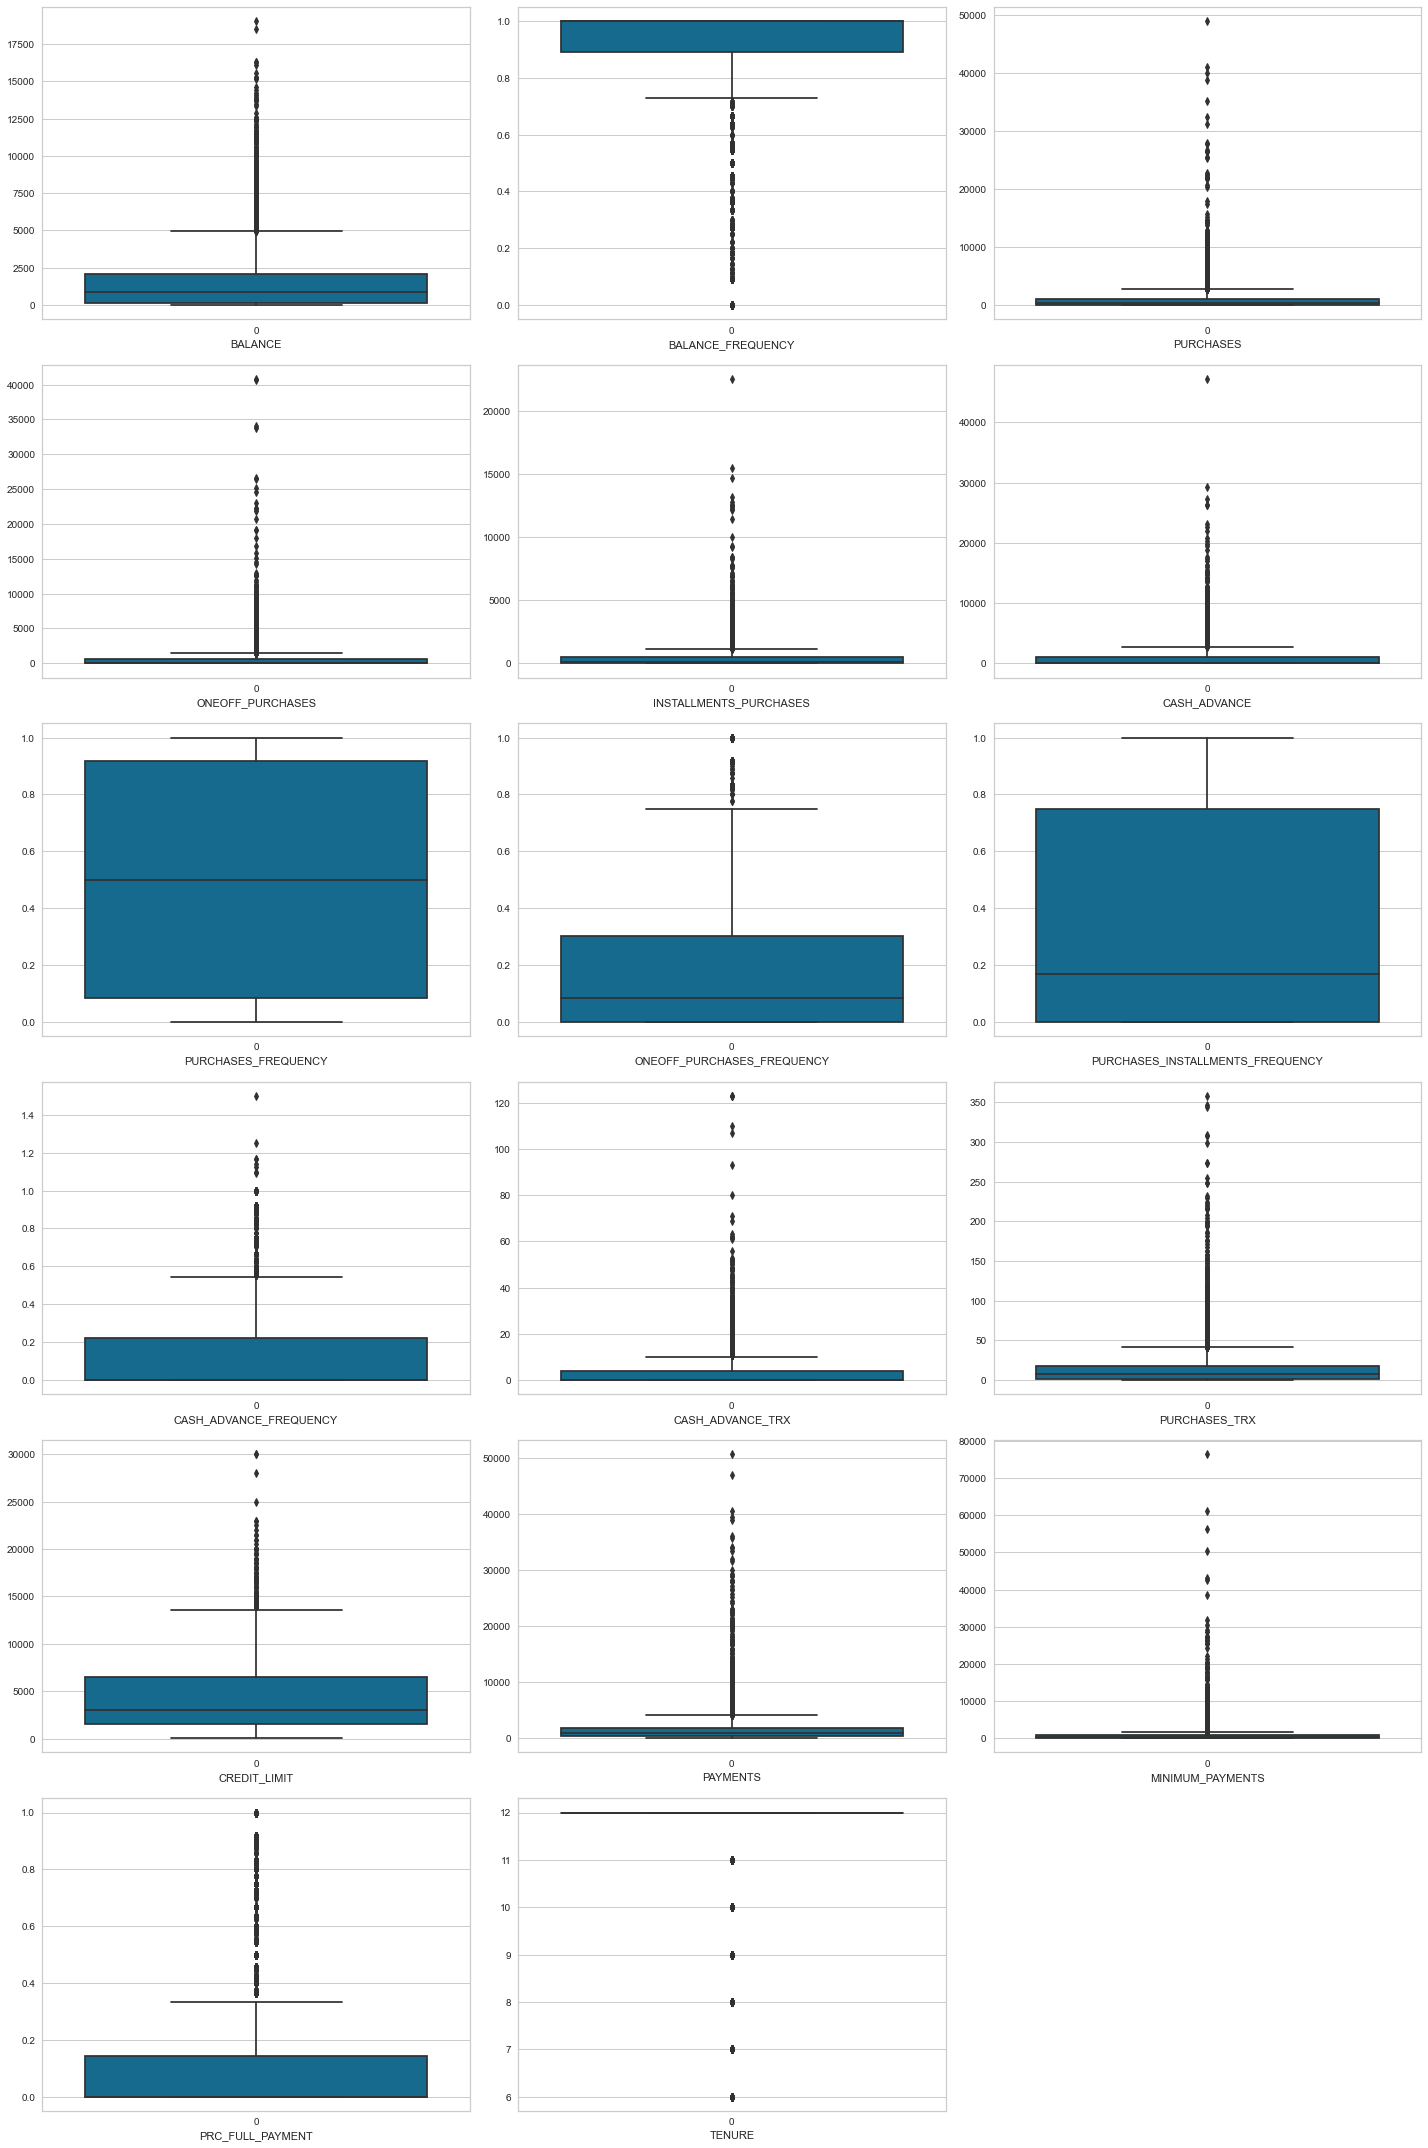

In [159]:
# Let's check the outliers from boxplots

plt.figure(figsize=(20, 30))

for i, col in enumerate(df.columns):
    ax = plt.subplot(6, 3, i+1)
    sns.boxplot(data=df[col], ax=ax)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [160]:
# At first I'll set all outliers as NaN, then impute the missing values

for col in df.columns:

    data = df[col]
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    min = Q1 - (1.5 * IQR)
    max = Q3 + (1.5 * IQR)
 
    outliers = ( (data < min) | (data > max) )

    df.loc[outliers, col] = np.nan
    
df.isna().sum()

BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         248
PAYMENTS                             808
MINIMUM_PAYMENTS                     889
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

In [161]:
# impute missing values with KNNImputer
imputer = KNNImputer()
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [162]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1237.242834,1275.049458,0.000000,128.281915,868.895628,1955.114566,4940.113918
BALANCE_FREQUENCY,8950.0,0.977871,0.060313,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,8950.0,613.512505,673.245027,0.000000,39.550000,360.000000,1027.622500,2711.900000
ONEOFF_PURCHASES,8950.0,230.735476,345.414742,0.000000,0.000000,27.935000,357.342000,1443.330000
INSTALLMENTS_PURCHASES,8950.0,224.507674,285.132782,0.000000,0.000000,89.000000,375.172500,1170.490000
CASH_ADVANCE,8950.0,453.778455,699.480792,0.000000,0.000000,0.000000,830.859029,2784.294727
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.169208,0.227268,0.000000,0.000000,0.083333,0.266667,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.105135,0.140727,0.000000,0.000000,0.000000,0.166667,0.545455


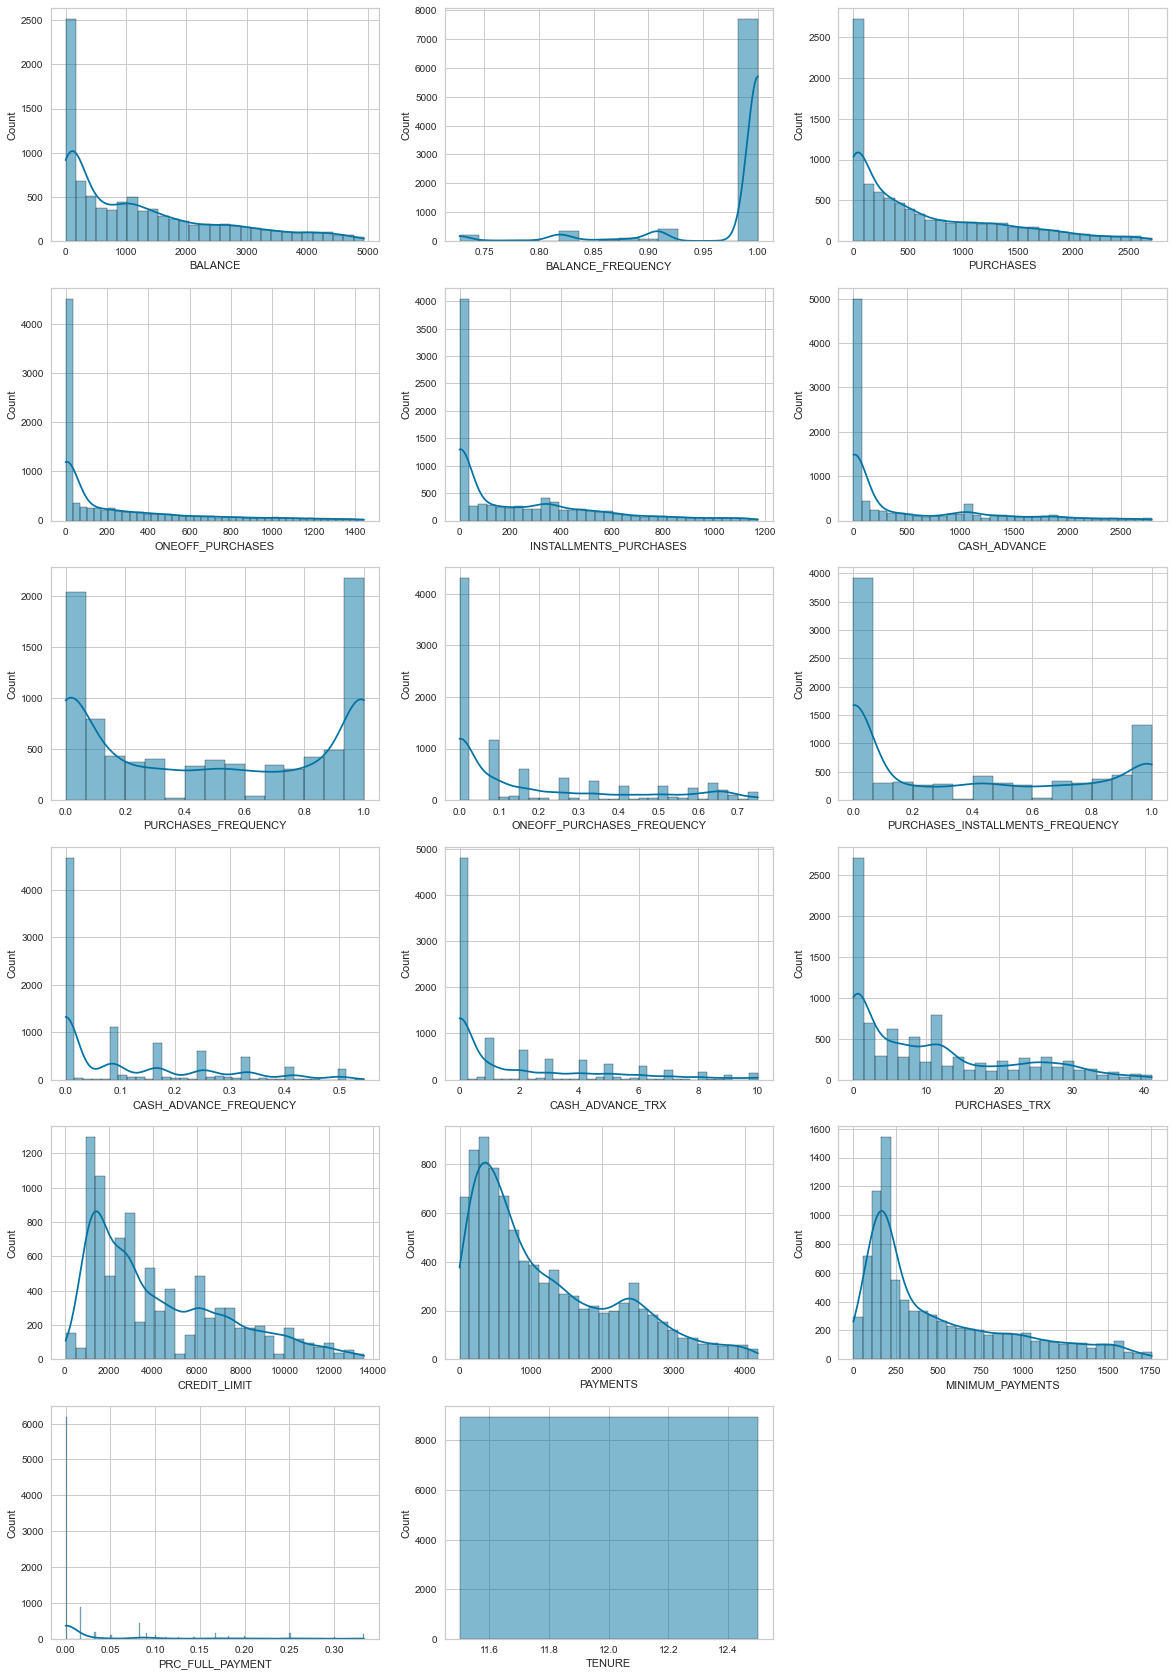

In [163]:
# Let's check the distributions of our features

plt.figure(figsize=(20,30))

for i, col in enumerate(df.columns):
        ax = plt.subplot(6, 3, i+1)
        sns.histplot(df[col] , ax=ax , kde=True)
        plt.xlabel(col)

plt.show()

In [164]:
# TENURE column has now only one value
df['TENURE'].value_counts()

12.0    8950
Name: TENURE, dtype: int64

In [165]:
# It won't play any role in determining the cluster, I'll drop it:
df.drop('TENURE', axis=1, inplace=True)

## Applying Log Transformation to handle the Skewness in our features

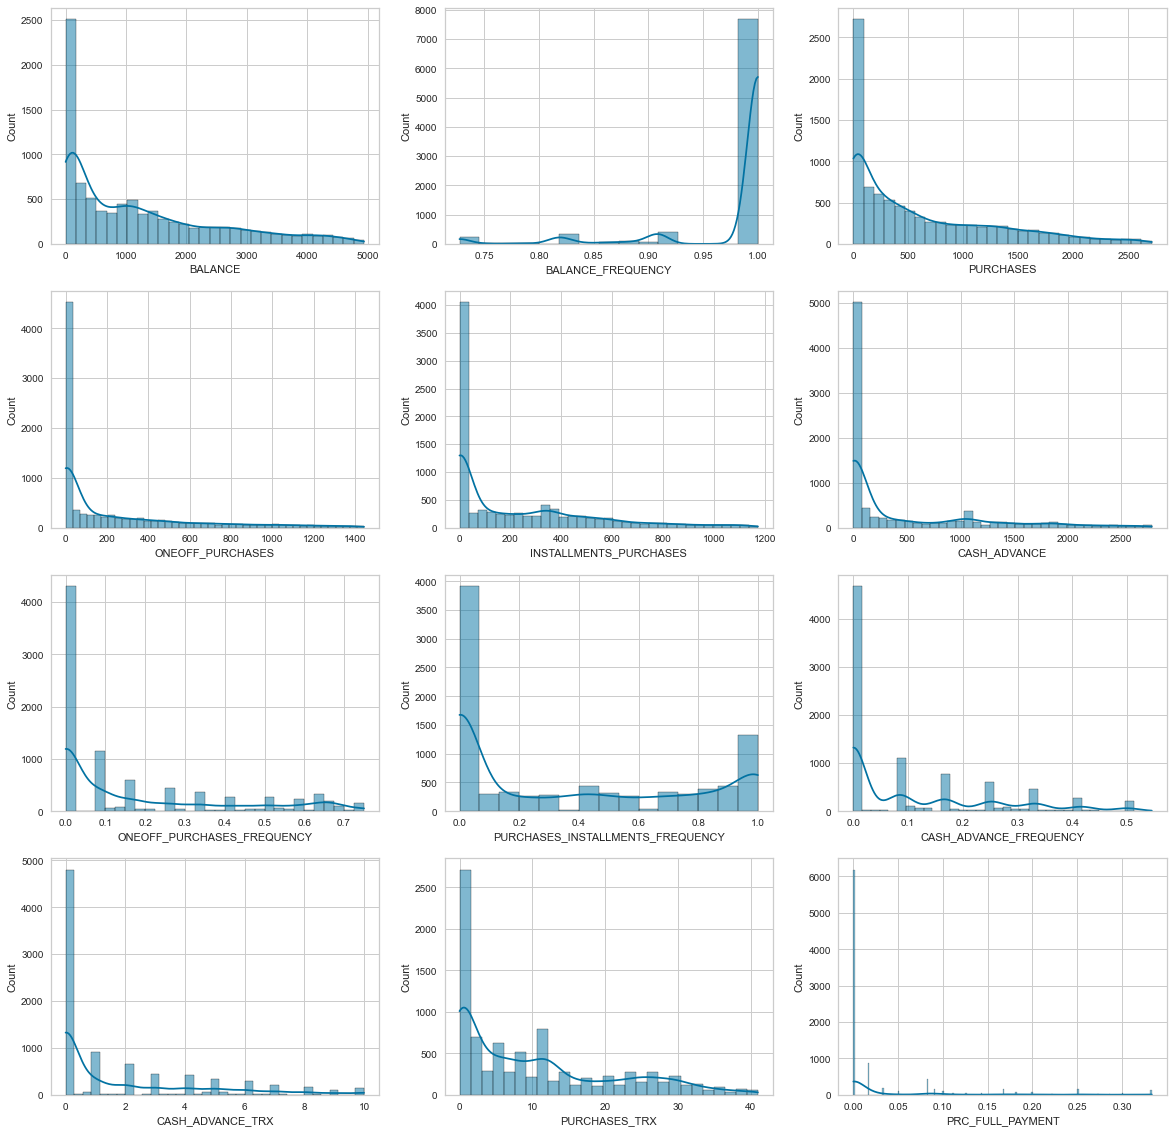

In [166]:
Skewed_Columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT']

# Let's check the distributions of skewed features

plt.figure(figsize=(20,20))

for i, col in enumerate(df[Skewed_Columns]):

        ax = plt.subplot(4, 3, i+1)
        sns.histplot(df[col] , ax=ax , kde=True)
        plt.xlabel(col)

plt.show()

In [167]:
# Let's apply log transformation

log_df = df.copy()

for col in Skewed_Columns:
    log_df[col] = np.log(1 + log_df[col])

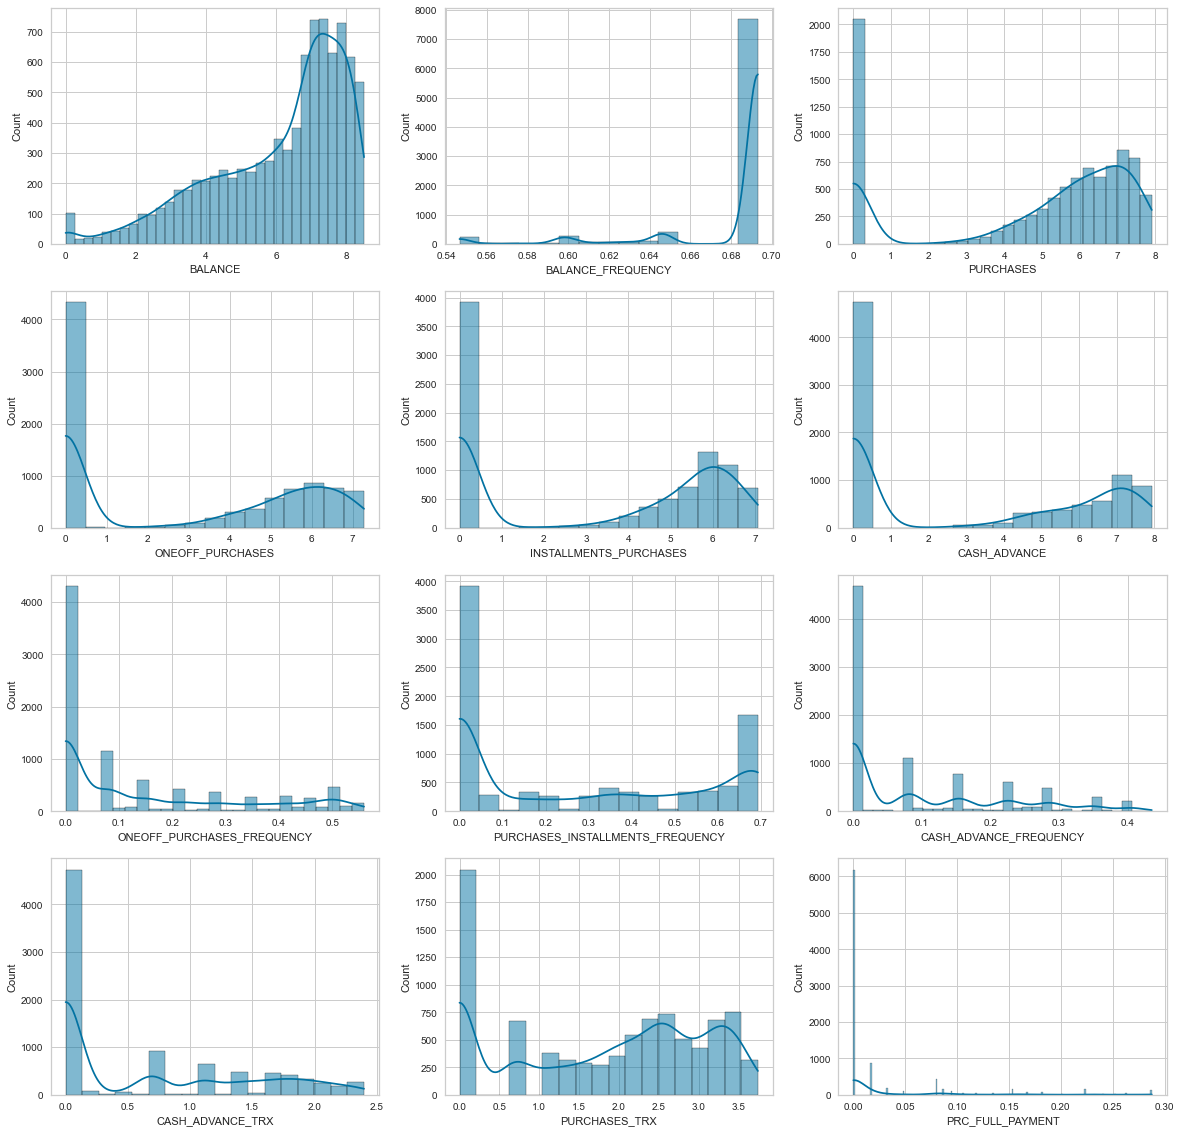

In [168]:
plt.figure(figsize=(20,20))

for i, col in enumerate(log_df[Skewed_Columns]):
        ax = plt.subplot(4, 3, i+1)
        sns.histplot(log_df[col] , ax=ax , kde=True)
        plt.xlabel(col)
        
plt.show()

## Standardizing features

In [169]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(log_df)

In [170]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,-1.217716,-2.621451,-0.075473,-0.996559,0.472231,-0.916841,-0.806490,-0.782910,-0.674253,-0.773024,-0.823824,-0.572307,-1.058176,-0.990740,-0.811649,-0.461893
1,1.024708,-1.093178,-1.712892,-0.996559,-1.103624,1.201508,-1.221758,-0.782910,-0.958256,1.091636,1.185125,-1.450590,0.875536,2.906035,1.333905,2.739015
2,0.895704,0.363986,0.671206,1.270965,-1.103624,-0.916841,1.269843,2.027457,-0.958256,-0.773024,-0.823824,0.599953,1.036678,-0.570955,0.310257,-0.461893
3,0.687153,0.077926,0.908272,0.749861,-1.103624,0.702520,-1.014125,-0.333709,-0.958256,-0.104164,0.041383,-0.896455,1.036678,-1.192312,-0.258901,-0.461893
4,0.319276,0.363986,-0.697427,-0.030747,-1.103624,-0.916841,-1.014125,-0.333709,-0.958256,-0.773024,-0.823824,-0.896455,-0.993719,-0.514752,-0.569496,-0.461893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-1.399280,0.363986,0.321886,-0.996559,0.854651,-0.916841,1.269843,-0.782910,1.192408,-0.773024,-0.823824,0.105063,-1.058176,-0.867089,-1.020087,-0.198234
8946,-1.595420,0.363986,0.332619,-0.996559,0.864980,-0.916841,1.269843,-0.782910,1.192408,-0.773024,-0.823824,0.105063,-1.058176,-0.916765,-0.773582,-0.461893
8947,-1.497341,-2.361513,0.071829,-0.996559,0.613995,-0.916841,0.854576,-0.782910,0.854234,-0.773024,-0.823824,-0.018172,-1.058176,-1.111134,-0.942962,3.097484
8948,-1.767936,-2.361513,-1.712892,-0.996559,-1.103624,0.184432,-1.221758,-0.782910,-0.958256,0.515112,0.547497,-1.450590,-1.219319,-1.139822,-1.004287,3.097484


## Dimensionality Reduction with PCA

In [171]:
# First, I will Make Componentes to all features in the data.

pca = PCA()

X_pca = pca.fit_transform(df_scaled)

In [172]:
# Convert to dataframe

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]

X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,0.090682,-3.079626,-0.101783,0.632188,-0.157230,2.415376,0.203315,-0.227419,0.357495,0.032719,0.142866,-0.456083,0.693266,-0.031203,0.087052,0.108793
1,3.617699,1.717110,0.378266,3.032022,2.746700,-0.233210,1.305641,-0.469363,0.038545,0.297618,0.030014,-0.045331,-0.193343,-0.138810,-0.031546,0.065891
2,-1.555742,1.115002,-2.619691,-1.046115,-0.101750,0.026147,0.158507,0.903663,-1.133348,0.428702,0.360891,0.798641,0.066526,-0.065472,0.171635,0.546885
3,1.251598,0.106938,-1.527086,-0.619642,-0.173499,0.271443,-0.605672,1.155522,0.515122,-1.253275,-0.340537,0.756828,0.223772,0.295353,0.641110,-0.234732
4,1.040037,-1.788490,-1.407773,-0.961468,0.094043,-0.145380,0.861112,-0.500195,-0.353319,-0.528108,0.215859,-0.000216,-0.187506,-0.099294,-0.046685,-0.050959


In [173]:
pca.explained_variance_ratio_

array([0.35888022, 0.19011207, 0.1032668 , 0.07845985, 0.06346546,
       0.05677207, 0.04272311, 0.03363318, 0.01894223, 0.0169816 ,
       0.01039979, 0.0093572 , 0.00813509, 0.00443509, 0.00246338,
       0.00197285])

In [174]:
pca.explained_variance_ratio_.cumsum()

array([0.35888022, 0.54899229, 0.65225909, 0.73071894, 0.7941844 ,
       0.85095647, 0.89367958, 0.92731276, 0.94625499, 0.96323659,
       0.97363638, 0.98299358, 0.99112868, 0.99556377, 0.99802715,
       1.        ])

In [179]:
def plot_variance(pca, width=8, dpi=100):
  
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)

    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )

    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure

    fig.set(figwidth=10, dpi=100)
    plt.show()
    return axs

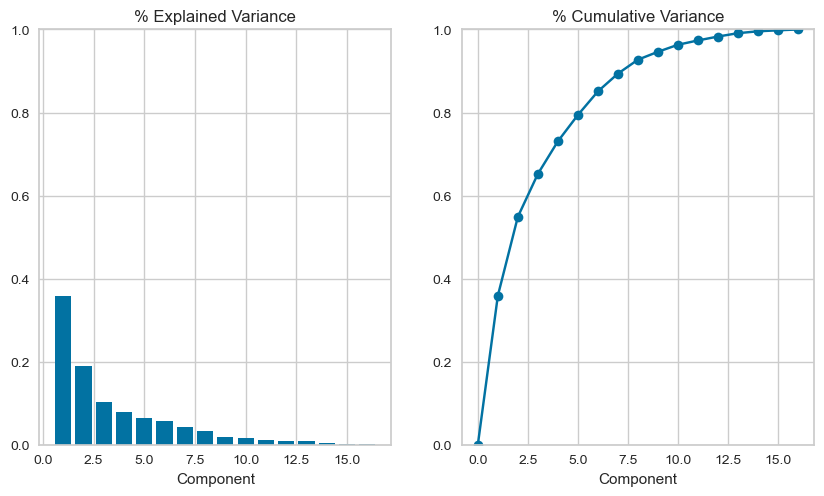

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

In [180]:
plot_variance(pca)

    About 80% of the Variance in the data is explained by only 5 components.

    About 95% of the variance in the data is explained by only 9 components.

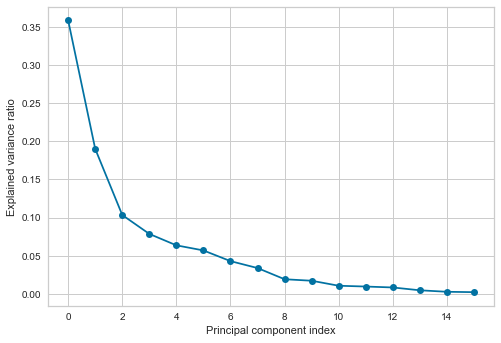

In [181]:
# Plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_, '-o')

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

In [36]:
# apply PCA and display clustering metrics
for y in range(10, 13):
    print("PCA with # of components: ", y)
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(X_scaled)
    for x in range(2, 10):
        alg = KMeans(n_clusters = x, )
        label = alg.fit_predict(data_p)
        print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_p, label) , '     Inertia: ',alg.inertia_)
    print()

PCA with # of components:  10
Silhouette-Score for 2 Clusters:  0.22412044774473489      Inertia:  115541.79537183534
Silhouette-Score for 3 Clusters:  0.25875762108417366      Inertia:  99800.89624709284
Silhouette-Score for 4 Clusters:  0.2173431650955619      Inertia:  86965.02378362618
Silhouette-Score for 5 Clusters:  0.20887396005857942      Inertia:  79779.02062045483
Silhouette-Score for 6 Clusters:  0.22402474074567091      Inertia:  72935.08598494332
Silhouette-Score for 7 Clusters:  0.23274265193398586      Inertia:  67630.30542864048
Silhouette-Score for 8 Clusters:  0.2442227903596081      Inertia:  63000.750716771756
Silhouette-Score for 9 Clusters:  0.24872897874133976      Inertia:  58483.85838927398

PCA with # of components:  11
Silhouette-Score for 2 Clusters:  0.22120784329569082      Inertia:  119141.26167910223
Silhouette-Score for 3 Clusters:  0.2568208880213454      Inertia:  103359.91429614584
Silhouette-Score for 4 Clusters:  0.21174639695449704      Inertia: 

## Clustering using K-Means

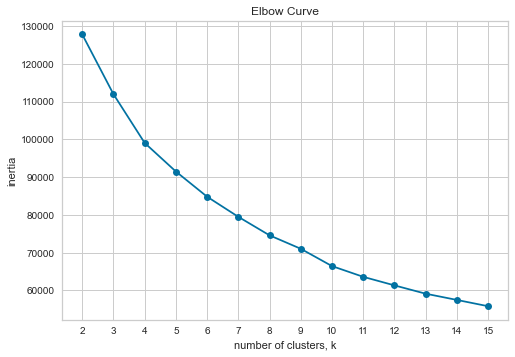

In [39]:
n_clusters = range(2, 16)
inertias = []

for k in n_clusters:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertias.append(model.inertia_)
    
# Plot n_clusters vs inertias
fig, ax = plt.subplots()
ax.plot(n_clusters, inertias, '-o')
ax.set_xlabel('number of clusters, k')
ax.set_ylabel('inertia')
ax.set_title('Elbow Curve')
ax.set_xticks(n_clusters)
plt.show()

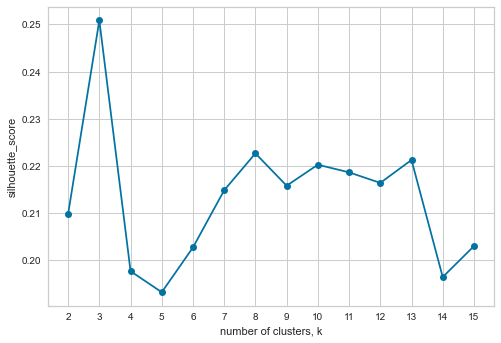

In [19]:
n_clusters=range(2, 16)
score=[]

for n in n_clusters:
    km = KMeans(n_clusters=n, random_state=42)
    km.fit_predict(X_scaled)
    score.append(silhouette_score(X_scaled, km.labels_, metric='euclidean'))

# Plot n_clusters vs inertias
fig, ax = plt.subplots()
ax.plot(n_clusters, score, '-o')
ax.set_xlabel('number of clusters, k')
ax.set_ylabel('silhouette_score')
ax.set_xticks(n_clusters)
plt.show()

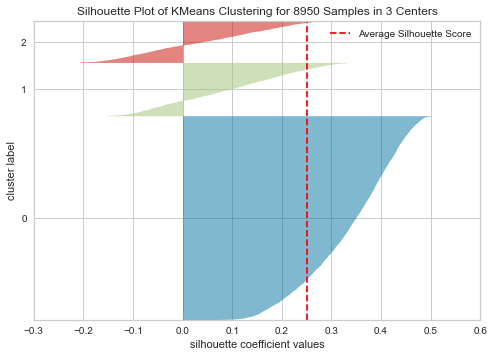

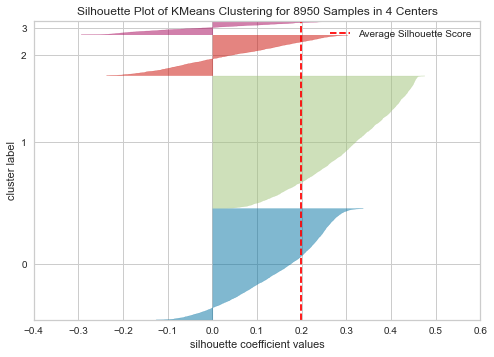

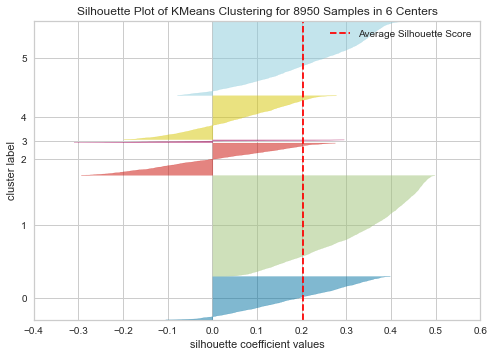

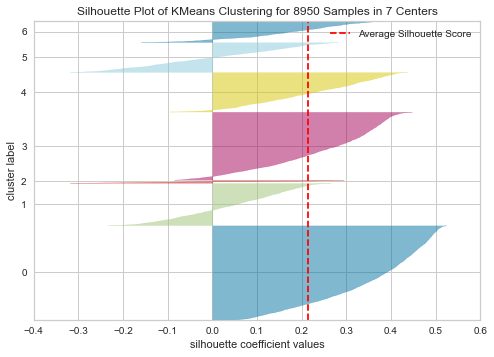

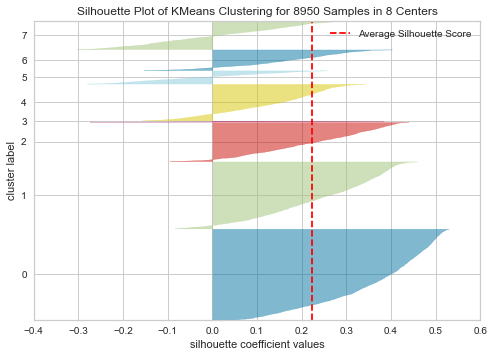

In [15]:
# Silhouette plots
fig, ax = plt.subplots()
for k in [3,4,6,7,8]:
    model = KMeans(k, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X_scaled)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

### I choose 6 clusters for the analysis as the best choice

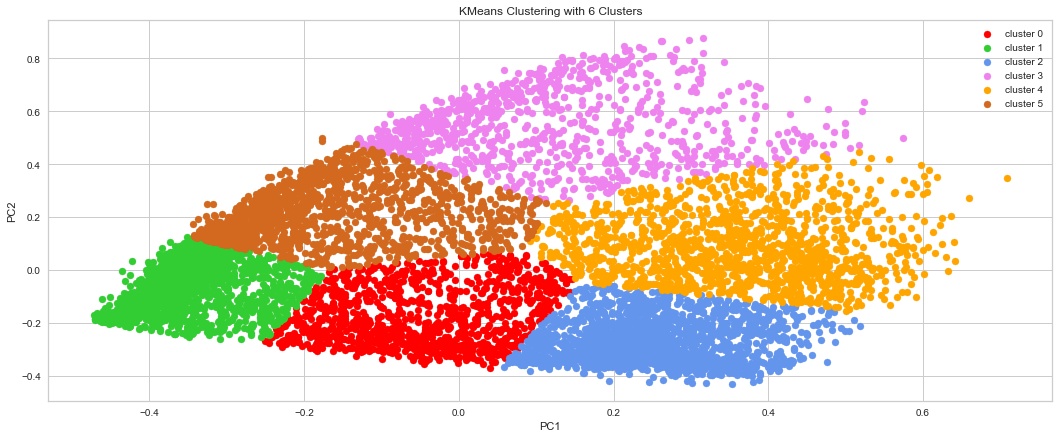

In [61]:
# PCA clusters visualization
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(Xn))
preds = pd.Series(KMeans(n_clusters = 6,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'limegreen', 'cornflowerblue', 'violet', 'orange', 'chocolate']

plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 0')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==5].iloc[:,0], data_p[data_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 5')
plt.legend()
plt.title('KMeans Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [23]:
# create model with 6 clusters
kmean= KMeans(6, random_state=42)
kmean.fit(Xn)
labels=kmean.labels_

# create new dataframe with clusters
clusters=pd.concat([df_imputed, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,431.220627,0.000000,12.0,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,4


###  Interpretation of Clusters

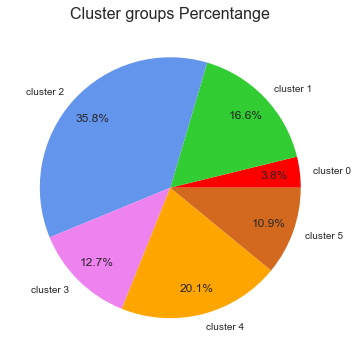

In [53]:
# create pie chart
clas = dict(clusters.groupby('cluster')['cluster'].count())
labels = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5']
colors = ['red', 'limegreen', 'cornflowerblue', 'violet', 'orange', 'chocolate']
values = clas.values()
plt.figure(figsize=(6,6))
plt.pie(data=df, x=values, labels=labels, autopct = '%1.1f%%', pctdistance=0.8, colors=colors)
plt.title('Cluster groups Percentange', fontsize=16)
plt.show()

In [54]:
# Function that defines boxplots for each customer group
def create_boxplots(col1, col2, col3):
    fig, axes = plt.subplots(1, 3, figsize=(12, 6))
    axes = axes.flatten()

    for i, col in enumerate([col1, col2, col3]):
        sns.boxplot(data=clusters, x='cluster', y=col, ax=axes[i], showfliers=False, palette=colors)
        axes[i].set_title(col)

    fig.tight_layout()
    plt.show()

## Cluster 0  (Red):  "Credit Card Power Shoppers"

#### Customers with lowest credit limit. With the highest minimum amount of payments,  purchases mostly in installments, 

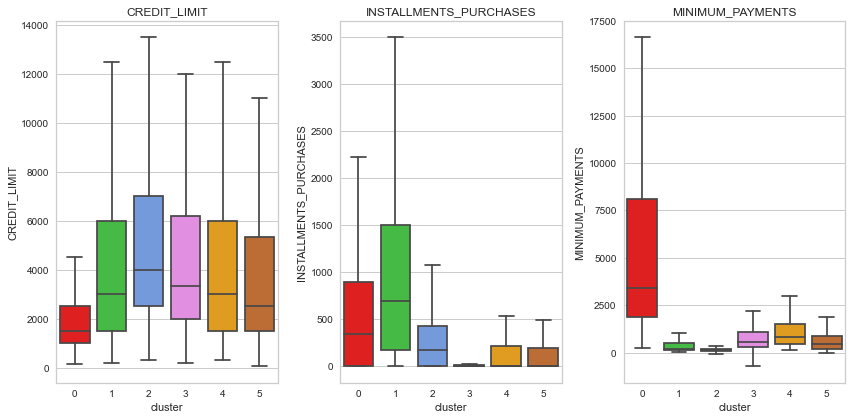

In [55]:
create_boxplots('CREDIT_LIMIT', 'INSTALLMENTS_PURCHASES', 'MINIMUM_PAYMENTS')

## Cluster 1 (Green): "Installment Enthusiasts"

#### Customers with the highest number of purchases (mostly done  in installments) and  highest payments

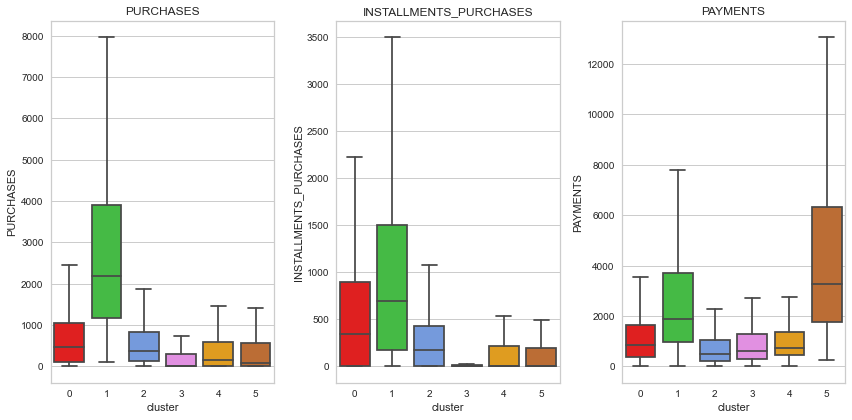

In [56]:
create_boxplots('PURCHASES', 'INSTALLMENTS_PURCHASES', 'PAYMENTS')

## Cluster 2 (Blue) "High-Limit Minimalists"

#### The biggest group with highest average credit limit. With small balance (amount left in their account to make purchases) and small cash in advance given by the user

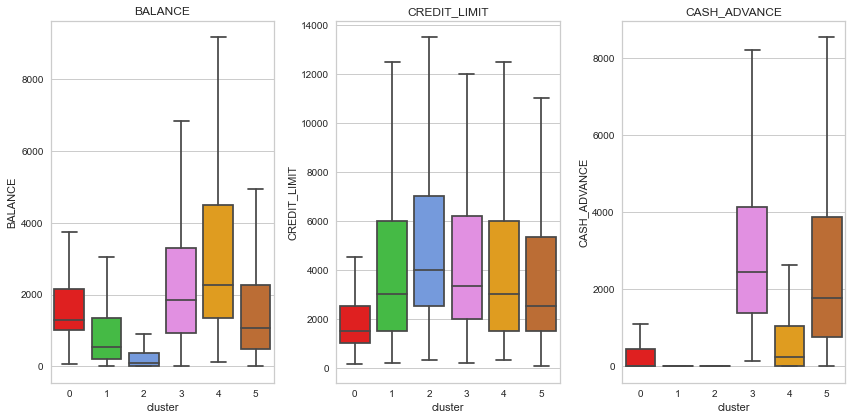

In [57]:
create_boxplots('BALANCE', 'CREDIT_LIMIT', 'CASH_ADVANCE')

## Cluster 3 (purple) "Short Tenure Cash Advance Users"

#### People with shortest tenure, that's why also smallest number of purchases.  With the highest cash in advance given by the user

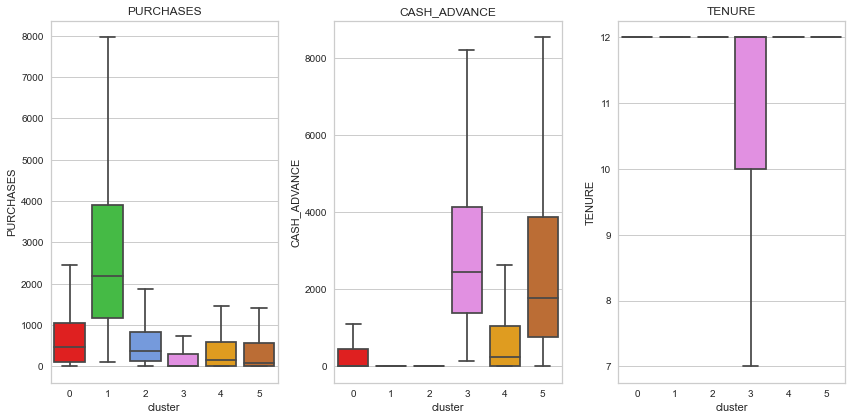

In [58]:
create_boxplots('PURCHASES', 'CASH_ADVANCE', 'TENURE')

## Cluster 4 (Orange) "Account Balance Savers"

#### Customers with highest balance (amount left in their account to make purchases), average credit limit and small number of purchases

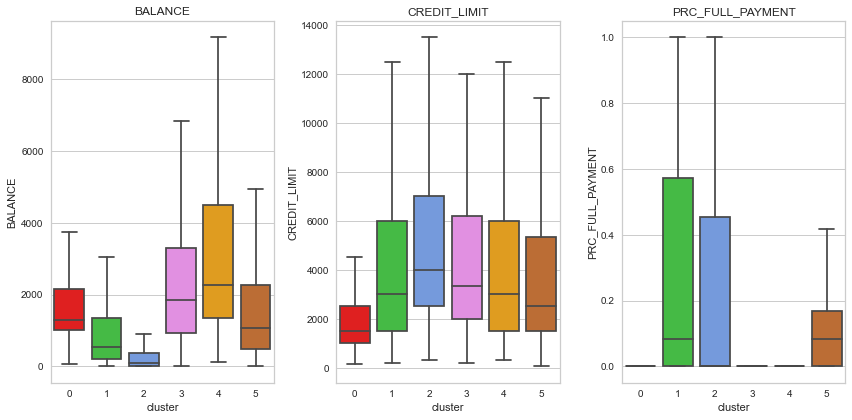

In [59]:
create_boxplots('BALANCE', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT')

## Cluster 5 (brown) "Payment Power Users"

#### Users with highest payments and cash in advance given by the user

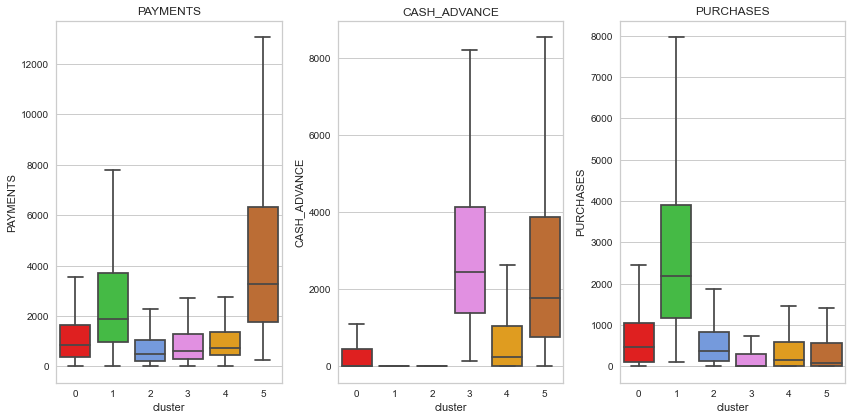

In [60]:
create_boxplots('PAYMENTS', 'CASH_ADVANCE', 'PURCHASES')